No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

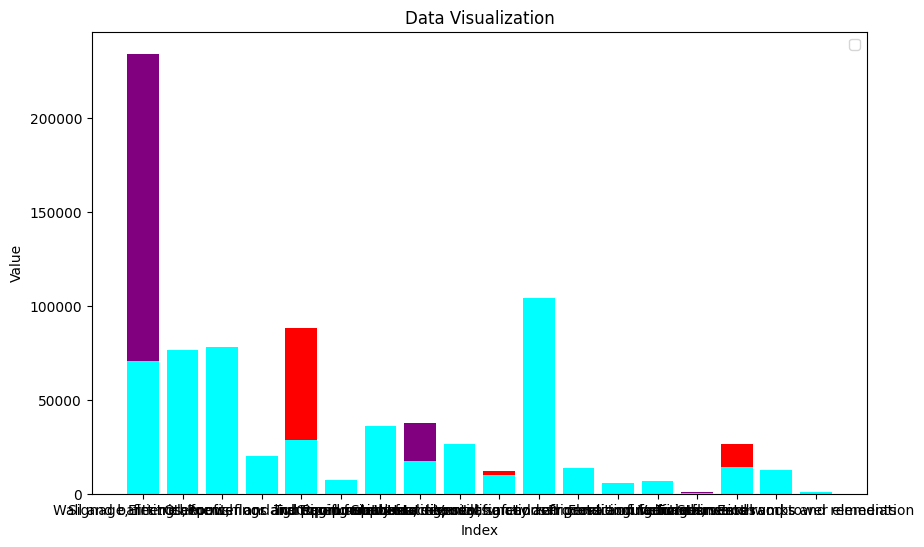

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


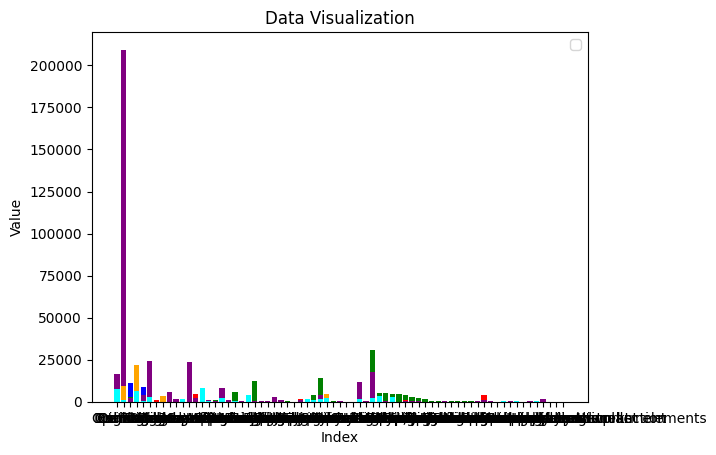

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


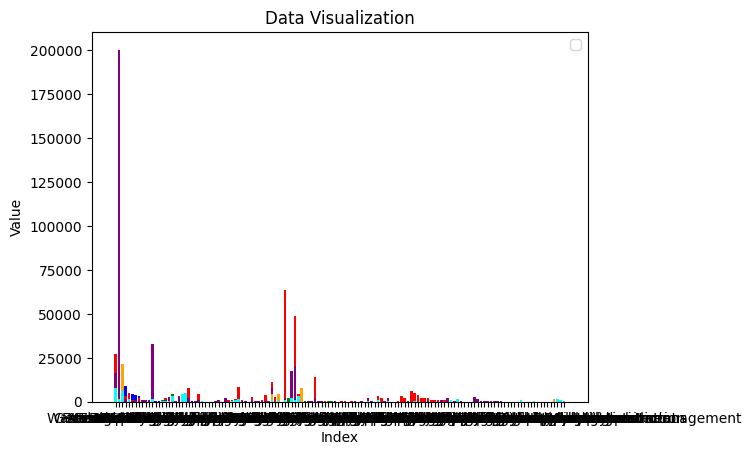

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


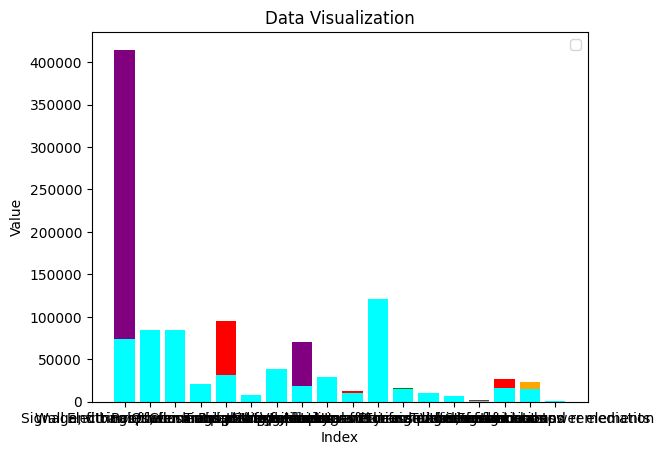

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


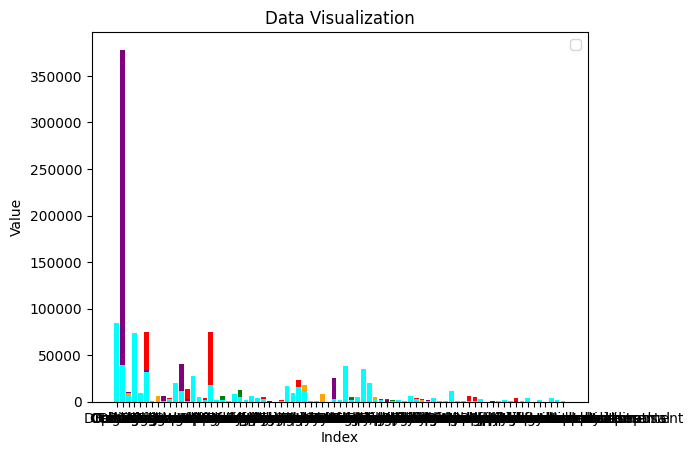

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


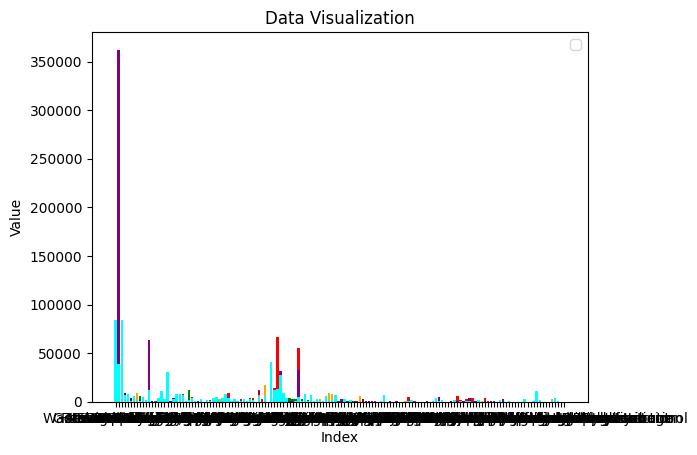

In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the folder containing CSV files
folder_path = 'tables'

# Initialize an empty dictionary to store dataframes for each country
dataframes = {}
# Initialize a plot
plt.figure(figsize=(10, 6))

dict_level = {"1":"firstb_level", "3":"third_level", "4":"fourth_level"}
dict_type = {"uk":"Price", "swiss":"LastPrice", "belgium":"Latest_Price","danish":"LastPrice",  "french":"price_latest", "german":"LastPriceNumeric"} 

data = {"count":[{"6m":[{"1":[{}], "3":[{}], "4":[{}]}], "all":[{"1":[{}], "3":[{}], "4":[{}]}]}], "rev":[{"6m":[{"1":[{}], "3":[{}], "4":[{}]}], "alltime":[{"1":[{}], "3":[{}], "4":[{}]}]}]}


# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Extract country name from filename
        country = filename.split('_')[0]
        if len(filename.split('_'))==4:
            change, metric, duration = filename.split('_')[1], filename.split('_')[2], filename.split('_')[3].rstrip('.csv')
            df = pd.read_csv(folder_path+"/"+filename)
        else:
            change, duration = filename.split('_')[1], filename.split('_')[2].rstrip('.csv')
            df = pd.read_csv(folder_path+"/"+filename)
            metric = "count"

        if metric == "count":
            if duration == "6m":
                data["count"][0][duration][0][change][0][country] = df
            elif duration == "all":
                data["count"][0][duration][0][change][0][country] = df
        elif metric == "rev":
            if duration == "6m":
                data["rev"][0][duration][0][change][0][country] = df
            elif duration == "alltime":
                data["rev"][0][duration][0][change][0][country] = df

    
# Create a new figure
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.2

import numpy as np
# Set the x locations for the groups
index = np.arange(3)

# Define colors for bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Iterate over the data
for metric in ["rev"]:
    for duration in data[metric][0].keys():
        for change in ["1", "3", "4"]:
            for index, country in enumerate(["belgium", "french", "german", "danish", "uk", "swiss"]):
                plt.bar(data[metric][0][duration][0][change][0][country][dict_level[change]].to_list(), data[metric][0][duration][0][change][0][country][dict_type[country]].to_list(), color=colors[index])
            # Add labels and legend
            plt.xlabel('Index')
            plt.ylabel('Value')
            plt.title('Data Visualization')
            plt.legend()

            # Show plot
            plt.show()




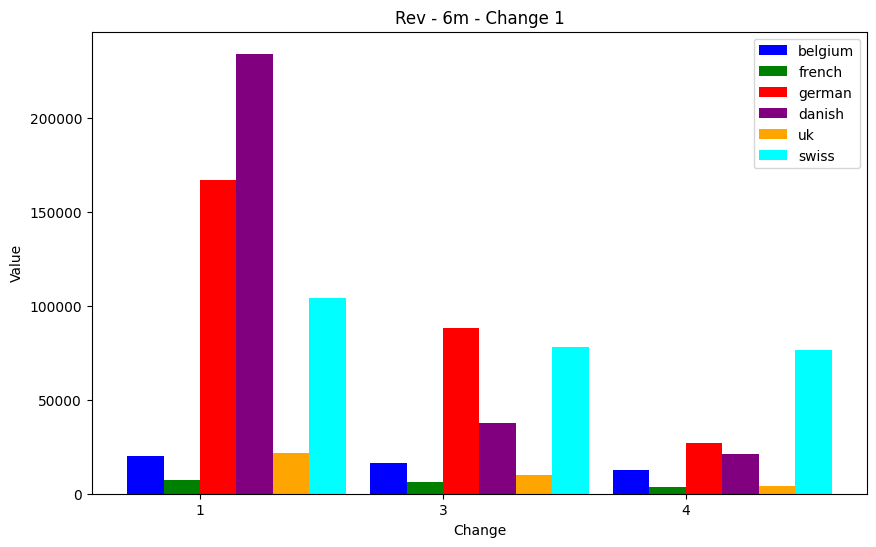

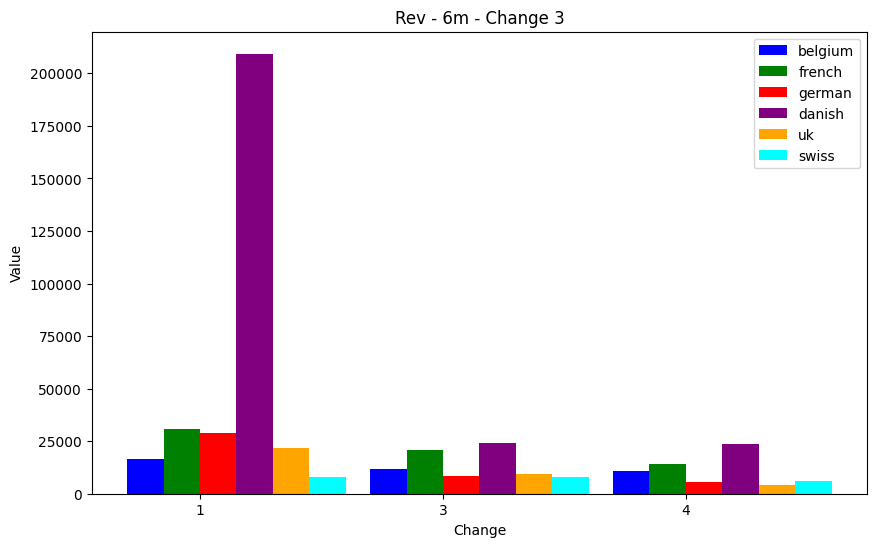

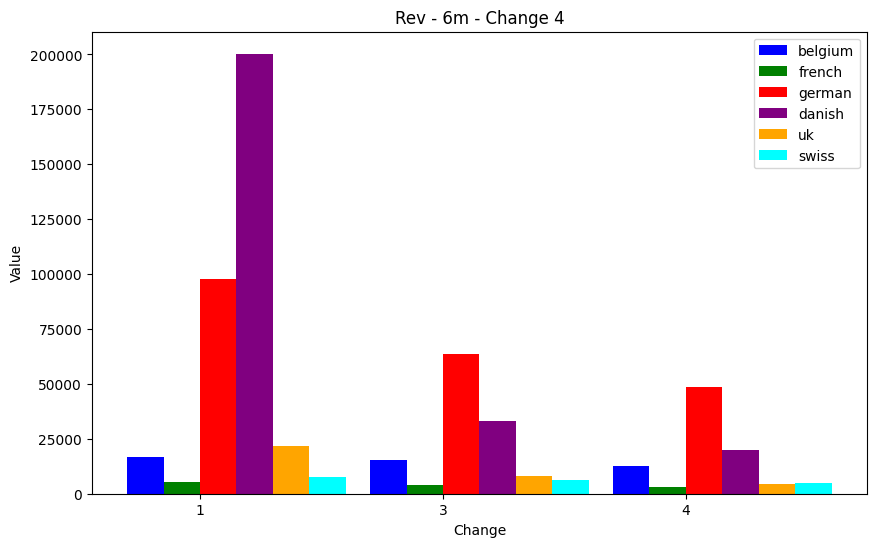

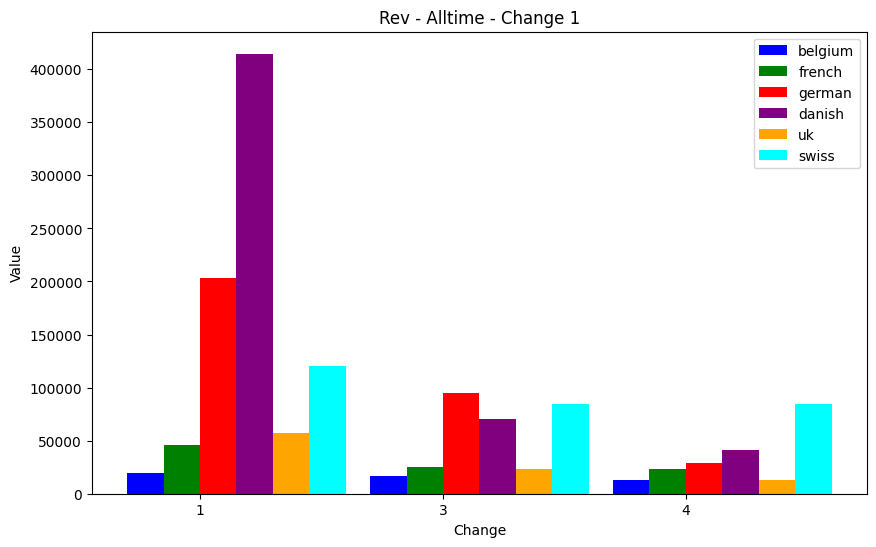

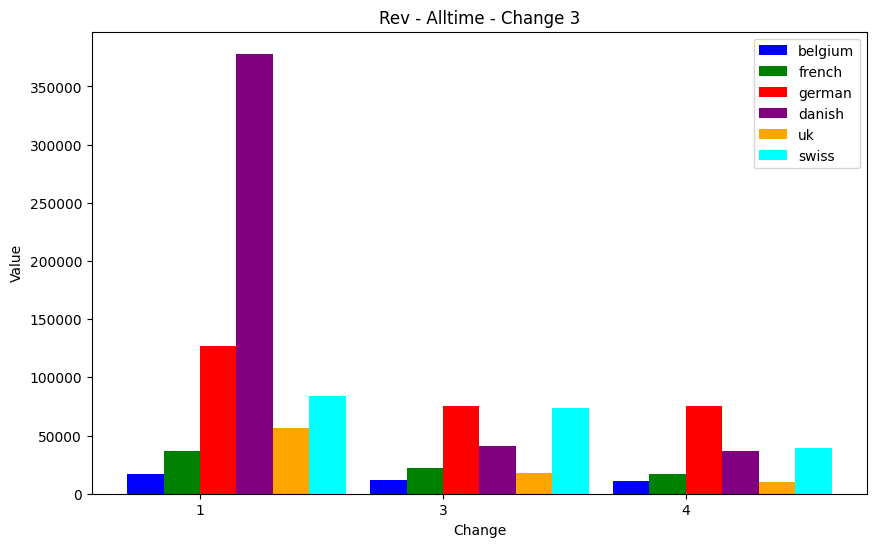

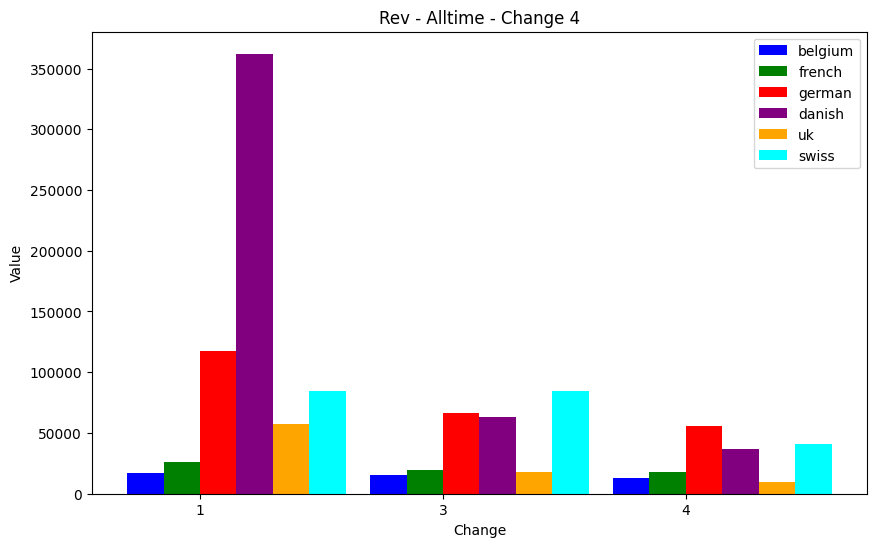

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing CSV files
folder_path = 'tables'

dict_level = {"1": "firstb_level", "3": "third_level", "4": "fourth_level"}
dict_type = {"uk": "Price", "swiss": "LastPrice", "belgium": "Latest_Price", "danish": "LastPrice",
             "french": "price_latest", "german": "LastPriceNumeric"}

# Set the bar width
bar_width = 0.15

# Set the x locations for the bars
index = np.arange(3)

# Define colors for bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Iterate over the data
for metric in ["rev"]:
    for duration in data[metric][0].keys():
        for change in ["1", "3", "4"]:
            # Create a new figure for each change
            plt.figure(figsize=(10, 6))

            for country_index, country in enumerate(["belgium", "french", "german", "danish", "uk", "swiss"]):
                df = data[metric][0][duration][0][change][0][country]
                x_pos = index + bar_width * (country_index - 3 / 2)  # Adjust x-position for each country
                plt.bar(x_pos, df[dict_type[country]].tolist()[:3], bar_width, color=colors[country_index], label=country)

            # Add labels and legend
            plt.xlabel('Change')
            plt.ylabel('Value')
            plt.title(f'{metric.capitalize()} - {duration.capitalize()} - Change {change}')
            plt.xticks(index, ['1', '3', '4'])
            plt.legend()
